<a href="https://colab.research.google.com/github/greinaldi/repositorio/blob/main/Airline_Passenger_Satisfaction_MachineLearning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Airline Passenger Satisfaction

Aplicação de modelos de classificação de Aprendizado de Máquina.
Projeto da disciplina de Aprendizado de Máquina, FATEC Franca.

Link do dataset: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=train.csv

Sobre o conjunto de dados: O conjunto de dados contém uma pesquisa de satisfação de passageiros de companhias aéreas, com duas classes: 'satisfied' e 'neutral or dissatisfied'.


Sumário:

- Importação das bibliotecas

- Leitura dos dados

- Pré-processamento: eliminação de valores irrelevantes

- Pré-processamento: tratamento de valores ausentes e duplicados

- Pré-processamento: outliers

- Correlação dos atributos

- Pré-processamento: transformação dos dados categóricos em numéricos

- Distribuição de classes

- Definição dos atributos preditores e alvo, Criação do conjunto de validação

- Modelos de classificação: Regressão Logística (RL), Análise Linear Discriminante (LDA), K-vizinhos mais próximos (KNN), Árvores de Classificação (Decision Tree), Gaussian Naive Bayes (NB) e Support Vector Machines (SVM)

- Deploy JOBLIB

#### Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.multiclass import OneVsRestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

In [ ]:
import joblib

#### Leitura dos dados

In [ ]:
# Carregamento dos dados
dados = pd.read_csv('/content/drive/MyDrive/AprendizadoDeMaquina/airline_Passenger_Satisfaction.csv')
pd.set_option('display.max_columns', None)

In [ ]:
# Nome das colunas, valores nulos e tipos de dados.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [ ]:
# Visualização do dataset
dados.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


#### Pré-processamento: eliminação de valores irrelevantes

In [ ]:
# Exclusão dos atributos 'Unnamed: 0' e 'id'
dados.drop(columns=['Unnamed: 0', 'id'], axis=1, inplace=True)

#### Pré-processamento: tratamento de valores ausentes e duplicados

In [ ]:
# Possíveis valores ausentes
ausentes = pd.DataFrame({
    'Quantidade': dados.isnull().sum(),
    'Freq. Relativa': dados.isnull().sum() / len(dados) * 100
})
print(ausentes)

                                   Quantidade  Freq. Relativa
Gender                                      0        0.000000
Customer Type                               0        0.000000
Age                                         0        0.000000
Type of Travel                              0        0.000000
Class                                       0        0.000000
Flight Distance                             0        0.000000
Inflight wifi service                       0        0.000000
Departure/Arrival time convenient           0        0.000000
Ease of Online booking                      0        0.000000
Gate location                               0        0.000000
Food and drink                              0        0.000000
Online boarding                             0        0.000000
Seat comfort                                0        0.000000
Inflight entertainment                      0        0.000000
On-board service                            0        0.000000
Leg room

In [ ]:
# Visualização dos valores ausentes
dados[dados.isnull().any(axis=1)]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,5,5,5,5,5,2,4,1,1,5,31,NaN,satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,4,3,4,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,2,4,3,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,2,3,2,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,5,2,5,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127976,Male,Loyal Customer,45,Business travel,Eco,352,5,1,1,1,5,5,5,5,1,1,1,3,2,5,26,NaN,satisfied
128037,Female,Loyal Customer,29,Business travel,Business,3873,3,3,3,3,3,3,3,3,3,4,4,4,3,3,19,NaN,neutral or dissatisfied
128205,Male,disloyal Customer,38,Business travel,Business,759,3,3,3,1,4,3,4,4,3,3,5,5,4,4,0,NaN,satisfied
129032,Female,Loyal Customer,52,Business travel,Business,3659,5,5,5,5,2,4,5,5,5,5,5,3,5,3,0,NaN,satisfied


In [ ]:
# Tratamento dos valores ausentes: substituição dos valore nulos no atributo 'Arrival Delay in Minutes' pela média, de acordo com a classe pertencente
# Atribuição da média por classe no atributo 'Arrival Delay in Minutes'
media_satisfied = dados.loc[(dados['satisfaction'] == 'satisfied')]['Arrival Delay in Minutes'].mean()
media_neutral_dissatisfied = dados.loc[(dados['satisfaction'] == 'neutral or dissatisfied')]['Arrival Delay in Minutes'].mean()

In [ ]:
# Média 'Arrival Delay in Minutes' na classe 'satisfied'
media_satisfied

np.float64(12.53385944331876)

In [ ]:
# Média 'Arrival Delay in Minutes' na classe 'neutral or dissatisfied'
media_neutral_dissatisfied

np.float64(17.05599180607716)

In [ ]:
# Substituição dos valores nulos pela Média 'Arrival Delay in Minutes' na classe 'satisfied'
dados.loc[(dados['satisfaction'] == 'satisfied') & (dados['Arrival Delay in Minutes'].isnull()), 'Arrival Delay in Minutes'] = media_satisfied

In [ ]:
# Substituição dos valores nulos pela Média 'Arrival Delay in Minutes' na classe 'neutral or dissatisfied'
dados.loc[(dados['satisfaction'] == 'neutral or dissatisfied') & (dados['Arrival Delay in Minutes'].isnull()), 'Arrival Delay in Minutes'] = media_neutral_dissatisfied

In [ ]:
# Verificação da existencia de dados ausentes após o tratamento
dados[dados.isnull().any(axis=1)]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


In [ ]:
# Verificação dos valores substituidos


In [ ]:
# Possíveis dados duplicados
dados.loc[dados.duplicated()]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


In [ ]:
dados.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

#### Pré-processamento: outliers

In [ ]:
# Descrição estatística
dados.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091295
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.407606
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


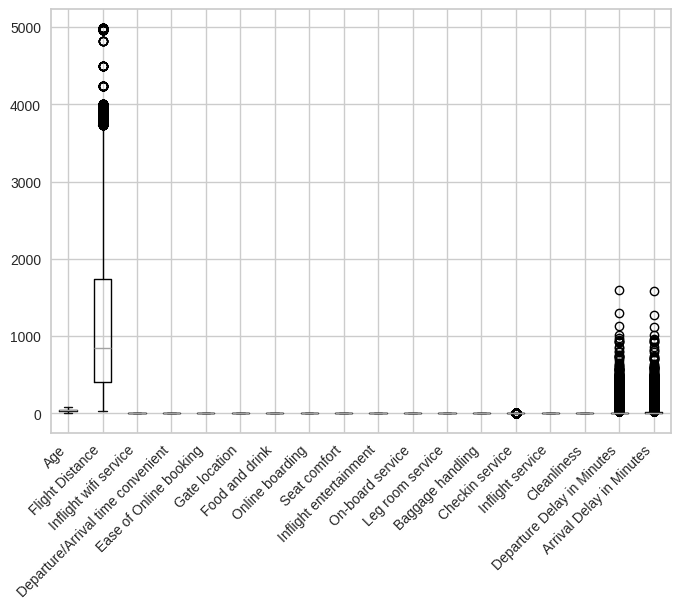

In [ ]:
dados.boxplot()
plt.xticks(rotation=45, ha='right')
plt.show()

#### Correlação dos atributos

<Axes: >

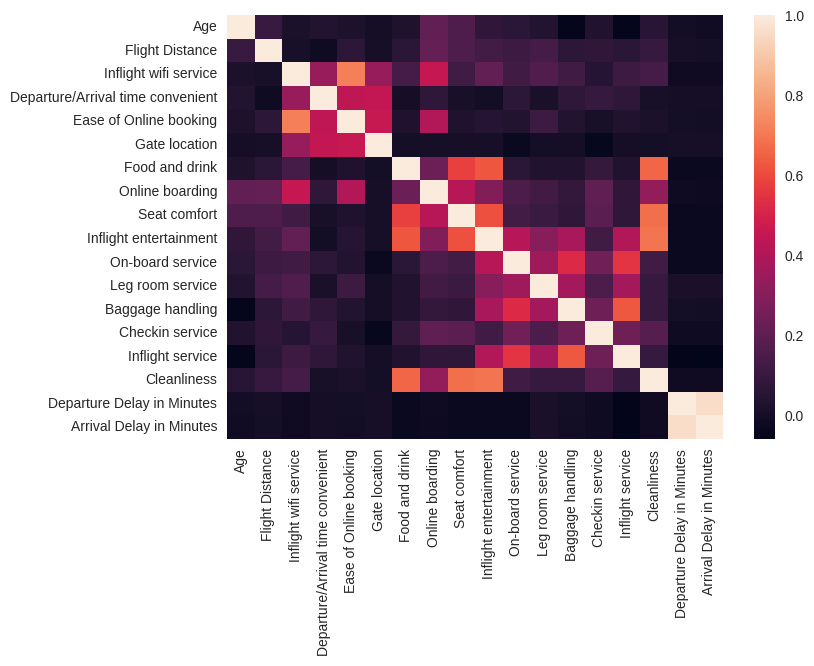

In [ ]:
dados_numericos = dados.select_dtypes(include=np.number)
correlacao = dados_numericos.corr()
sns.heatmap(correlacao)

#### Pré-processamento: transformação dos dados categóricos em numéricos

In [ ]:
dados.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [ ]:
lista_categoricas = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [ ]:
for i in dados.columns:
  if i in lista_categoricas:
    print(i, dados[i].unique())

Gender ['Male' 'Female']
Customer Type ['Loyal Customer' 'disloyal Customer']
Type of Travel ['Personal Travel' 'Business travel']
Class ['Eco Plus' 'Business' 'Eco']


In [ ]:
label_Gender = LabelEncoder()
label_CustomerType = LabelEncoder()
label_TypeOfTravel = LabelEncoder()
label_Class = LabelEncoder()

In [ ]:
dados['Gender'] = label_Gender.fit_transform(dados['Gender'])
dados['Customer Type'] = label_CustomerType.fit_transform(dados['Customer Type'])
dados['Type of Travel'] = label_TypeOfTravel.fit_transform(dados['Type of Travel'])
dados['Class'] = label_Class.fit_transform(dados['Class'])

In [ ]:
dados.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


#### Distribuição de classes

In [ ]:
porcentagem_classes = dados['satisfaction'].value_counts(normalize=True) * 100
print(porcentagem_classes)

satisfaction
neutral or dissatisfied    56.553742
satisfied                  43.446258
Name: proportion, dtype: float64


#### Definição dos atributos preditores e alvo, Criação do conjunto de validação

In [ ]:
# Conjunto de Validação
X = dados.iloc[:, 0:22]
Y = dados.iloc[:, 22]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed, stratify=dados['satisfaction'])

print(X_train.shape)
print(Y_train.shape)

print(X_validation.shape)
print(Y_validation.shape)

(103904, 22)
(103904,)
(25976, 22)
(25976,)


In [ ]:
# Métricas
seed = 7
scoring = 'accuracy'

In [ ]:
feature_names = X.columns
feature_names

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

#### Modelos de classificação: Regressão Logística (RL), Análise Linear Discriminante (LDA), K-vizinhos mais próximos (KNN), Árvores de Classificação (Decision Tree), Gaussian Naive Bayes (NB) e Support Vector Machines (SVM)

In [ ]:
# Algoritmos
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('LinearSVM', LinearSVC(max_iter=10000))) # Em substituição ao models.append(('SVM', SVC(gamma='auto')))

# Avaliação de cada modelo
results = []
names = []
for name, model in models:
   kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
   cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
   print(msg)

   print(cv_results)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

LR: 0.874403 (0.004231)
[0.86882879 0.87518044 0.87556539 0.87489173 0.8813282  0.87487969
 0.87536092 0.87333975 0.86573628 0.87892204]
LDA: 0.871006 (0.003348)
[0.86478683 0.87133096 0.87161967 0.87181215 0.87632339 0.87122233
 0.87045236 0.87093359 0.86612127 0.87545717]
KNN: 0.749230 (0.004248)
[0.75093831 0.7514195  0.74439419 0.75507651 0.75014437 0.75678537
 0.74735322 0.7439846  0.7479307  0.74427334]
CART: 0.946941 (0.001512)
[0.94601097 0.94678087 0.9458185  0.94591473 0.9452358  0.94783446
 0.95043311 0.94571704 0.94725698 0.94841193]
NB: 0.863788 (0.005160)
[0.85766529 0.86488307 0.86613415 0.86603792 0.86987488 0.86843118
 0.86381136 0.86669875 0.85158807 0.86275265]
LinearSVM: 0.873479 (0.004079)
[0.86661534 0.87489173 0.87412184 0.87556539 0.8798845  0.87353224
 0.87285852 0.87266603 0.86650626 0.87815207]


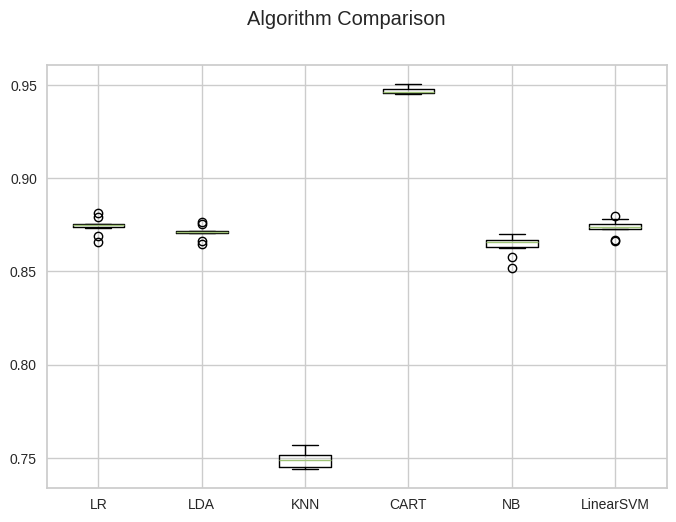

In [ ]:
# Comparação dos Algoritmos
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Precisão do modelo no conjunto de teste - CART
CART = DecisionTreeClassifier()
CART.fit(X_train, Y_train)
predictions_CART = CART.predict(X_validation)
print(accuracy_score(Y_validation, predictions_CART))
print(confusion_matrix(Y_validation, predictions_CART))
print(classification_report(Y_validation, predictions_CART))

0.9466430551278103
[[13994   696]
 [  690 10596]]
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.95      0.95     14690
              satisfied       0.94      0.94      0.94     11286

               accuracy                           0.95     25976
              macro avg       0.95      0.95      0.95     25976
           weighted avg       0.95      0.95      0.95     25976



In [ ]:
# Precisão do modelo no conjunto de teste - LR
LR = LogisticRegression(solver='liblinear', multi_class='ovr')
LR.fit(X_train, Y_train)
predictions_LR = LR.predict(X_validation)
print(accuracy_score(Y_validation, predictions_LR))
print(confusion_matrix(Y_validation, predictions_LR))
print(classification_report(Y_validation, predictions_LR))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.8746920234062211
[[13328  1362]
 [ 1893  9393]]
                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.91      0.89     14690
              satisfied       0.87      0.83      0.85     11286

               accuracy                           0.87     25976
              macro avg       0.87      0.87      0.87     25976
           weighted avg       0.87      0.87      0.87     25976



In [ ]:
# Precisão do modelo no conjunto de teste - LDA
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions_LDA = LDA.predict(X_validation)
print(accuracy_score(Y_validation, predictions_LDA))
print(confusion_matrix(Y_validation, predictions_LDA))
print(classification_report(Y_validation, predictions_LDA))

0.870611333538651
[[13245  1445]
 [ 1916  9370]]
                         precision    recall  f1-score   support

neutral or dissatisfied       0.87      0.90      0.89     14690
              satisfied       0.87      0.83      0.85     11286

               accuracy                           0.87     25976
              macro avg       0.87      0.87      0.87     25976
           weighted avg       0.87      0.87      0.87     25976



In [ ]:
# Precisão do modelo no conjunto de teste - KNN
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
predictions_KNN = KNN.predict(X_validation)
print(accuracy_score(Y_validation, predictions_KNN))
print(confusion_matrix(Y_validation, predictions_KNN))
print(classification_report(Y_validation, predictions_KNN))

0.7471512165075455
[[11823  2867]
 [ 3701  7585]]
                         precision    recall  f1-score   support

neutral or dissatisfied       0.76      0.80      0.78     14690
              satisfied       0.73      0.67      0.70     11286

               accuracy                           0.75     25976
              macro avg       0.74      0.74      0.74     25976
           weighted avg       0.75      0.75      0.75     25976



In [ ]:
# Precisão do modelo no conjunto de teste - NB
NB = GaussianNB()
NB.fit(X_train, Y_train)
predictions_NB = NB.predict(X_validation)
print(accuracy_score(Y_validation, predictions_NB))
print(confusion_matrix(Y_validation, predictions_NB))
print(classification_report(Y_validation, predictions_NB))

0.8628349245457345
[[13200  1490]
 [ 2073  9213]]
                         precision    recall  f1-score   support

neutral or dissatisfied       0.86      0.90      0.88     14690
              satisfied       0.86      0.82      0.84     11286

               accuracy                           0.86     25976
              macro avg       0.86      0.86      0.86     25976
           weighted avg       0.86      0.86      0.86     25976



In [ ]:
# Precisão do modelo no conjunto de teste - LinearSVM
LinearSVM = LinearSVC(max_iter=10000)
LinearSVM.fit(X_train, Y_train)
predictions_LinearSVM = LinearSVM.predict(X_validation)
print(accuracy_score(Y_validation, predictions_LinearSVM))
print(confusion_matrix(Y_validation, predictions_LinearSVM))
print(classification_report(Y_validation, predictions_LinearSVM))

0.8741915614413305
[[13340  1350]
 [ 1918  9368]]
                         precision    recall  f1-score   support

neutral or dissatisfied       0.87      0.91      0.89     14690
              satisfied       0.87      0.83      0.85     11286

               accuracy                           0.87     25976
              macro avg       0.87      0.87      0.87     25976
           weighted avg       0.87      0.87      0.87     25976



####JOBLIB

In [ ]:
# Salvando o modelo CART (o modelo escolhido)
joblib.dump(CART, 'modelo_cart.joblib')

# Carregando o modelo
loaded_model = joblib.load('modelo_cart.joblib')